# Derivation of the potential using simpy

In [2]:
# Código en SymPy para calcular el curl (rotacional) de los dos ejemplos proporcionados
import sympy as sp

# Definición de símbolos
X1, X2 = sp.symbols('X1 X2')
x, y = sp.symbols('x y')
a, c, I1, I2, I3 = sp.symbols('a c I1 I2 I3')

# Primer ejemplo (original del usuario)
phi_p, phi_pp, s0, IL, IC, IR, sL, sC, sR = sp.symbols('phi_p phi_pp s0 IL IC IR sL sC sR')

F1_ejemplo1 = (phi_p / 2)*(IL - IC + sL - sC) + s0**2 * phi_pp * X1 * X2
F2_ejemplo1 = (phi_p / 6)*(IL + IC - 2*IR + sL + sC - 2*sR) + (s0**2 * phi_pp / 6)*(X1**2 - 3*X2**2)

curl_ejemplo1 = sp.simplify(sp.diff(F2_ejemplo1, X1)*6 - sp.diff(F1_ejemplo1, X2)*2)
print(sp.latex( sp.simplify(sp.diff(F1_ejemplo1*2, X2))))
print(sp.latex( sp.simplify(sp.diff(F2_ejemplo1*6, X1))))
# Segundo ejemplo (de la imagen subida por el usuario, modelo poblacional con potencial explícito)
F1_ejemplo2 = a*(I1 - I2)/2 + x*y - c*(x**2 + 3*y**2)*x
F2_ejemplo2 = a*(I1 + I2 - 2*I3)/6 + (x**2 - 3*y**2)/6 - c*(x**2 + 3*y**2)*y

curl_ejemplo2 = sp.simplify(sp.diff(F2_ejemplo2, x)/2 - sp.diff(F1_ejemplo2, y)/6)

# Mostrar resultados del curl para ambos ejemplos
curl_ejemplo1, curl_ejemplo2


2 X_{1} \phi_{pp} s_{0}^{2}
2 X_{1} \phi_{pp} s_{0}^{2}


(0, 0)

In [3]:
# Definir la función potencial dada en SymPy y calcular sus derivadas parciales
x, y = sp.symbols('x y')
a, c, I1, I2, I3 = sp.symbols('a c I1 I2 I3')

# Definir la función potencial ψ(x,y)
psi = -a*(I1 - I2)*x - a*(I1 + I2 - 2*I3)*y - (y*x**2 - y**3) + c*(x**4/2 + (9/2)*y**4 + 3*x**2*y**2)

# Calcular derivadas parciales
dpsi_dx = sp.diff(psi, x)
dpsi_dy = sp.diff(psi, y)

# Simplificar las derivadas
dpsi_dx_simplified = sp.simplify(dpsi_dx)
dpsi_dy_simplified = sp.simplify(dpsi_dy)
-dpsi_dx_simplified
print()
-dpsi_dy_simplified/6 

a*(I1 + I2 - 2*I3)/6 - c*y*(6*x**2 + 18.0*y**2)/6 + x**2/6 - y**2/2

In [4]:
F2_ejemplo2

a*(I1 + I2 - 2*I3)/6 - c*y*(x**2 + 3*y**2) + x**2/6 - y**2/2

In [5]:
# Ahora calculamos explícitamente el potencial usando SymPy, dado que has reescrito el campo con factores adecuados.
import sympy as sp

# Definimos variables simbólicas
X1, X2 = sp.symbols('X1 X2')
phi_p, phi_pp, s0, IL, IC, IR, sL, sC, sR, R = sp.symbols('phi_p phi_pp s0 IL IC IR sL sC sR, R')

# Campo ajustado como lo planteas en la corrección
F1_bar = (phi_p / 2)*(IL - IC + R*(sL - sC)) + s0**2 * phi_pp * X1 * X2
F2_bar = (phi_p / 6)*(IL + IC - 2*IR + R*(sL + sC - 2*sR)) + (s0**2 * phi_pp / 6)*(X1**2 - 3*X2**2)

# Definir ahora el campo ajustado multiplicando la segunda componente por 3, como lo mencionas explícitamente
F1 = F1_bar
F2 = 3 * F2_bar

# Verificar nuevamente el curl para asegurar que el campo es irrotacional
curl = sp.simplify(sp.diff(F2, X1) - sp.diff(F1, X2))

# Calcular el potencial integrando respecto a X1 y luego respecto a X2
potencial = sp.integrate(F1, X1)  # Integramos respecto a X1
# Añadimos términos que dependen solo de X2 que no hayan sido considerados aún
potencial += sp.integrate(F2 - sp.diff(potencial, X2), X2)

# Simplificamos el resultado
potencial_simplificado = sp.simplify(potencial)

potencial_simplificado
print(sp.latex(potencial_simplificado))

\frac{X_{1}^{2} X_{2} \phi_{pp} s_{0}^{2}}{2} - \frac{X_{1} \phi_{p} \left(IC - IL + R sC - R sL\right)}{2} - \frac{X_{2}^{3} \phi_{pp} s_{0}^{2}}{2} + \frac{X_{2} \phi_{p} \left(IC + IL - 2 IR + R sC + R sL - 2 R sR\right)}{2}


In [6]:
dpsi_dx = sp.diff(potencial_simplificado, X1)
dpsi_dy = sp.diff(potencial_simplificado, X2)

# Simplificar las derivadas
dpsi_dx_simplified = sp.simplify(dpsi_dx)
dpsi_dy_simplified = sp.simplify(dpsi_dy)
dpsi_dy_simplified

X1**2*phi_pp*s0**2/2 - 3*X2**2*phi_pp*s0**2/2 + phi_p*(IC + IL - 2*IR + R*sC + R*sL - 2*R*sR)/2

<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
/var/folders/gk/r166p6nx2bb5zf2rlwww8fc00000gn/T/ipykernel_36105/3258004335.py:38: SyntaxWarning: invalid escape sequence '\p'
  caption = f"Chosen values: $\phi'={phi_p_val}, \phi''={phi_pp_val}, s_0={s0_val}, I_L={IL_val}, I_C={IC_val}, I_R={IR_val}, s_L={sL_val}, s_C={sC_val}, s_R={sR_val}, R = {R_val}$"
/var/folders/gk/r166p6nx2bb5zf2rlwww8fc00000gn/T/ipykernel_36105/3258004335.py:38: SyntaxWarning: invalid escape sequence '\p'
  caption = f"Chosen values: $\phi'={phi_p_val}, \phi''={phi_pp_val}, s_0={s0_val}, I_L={IL_val}, I_C={IC_val}, I_R={IR_val}, s_L={sL_val}, s_C={sC_val}, s_

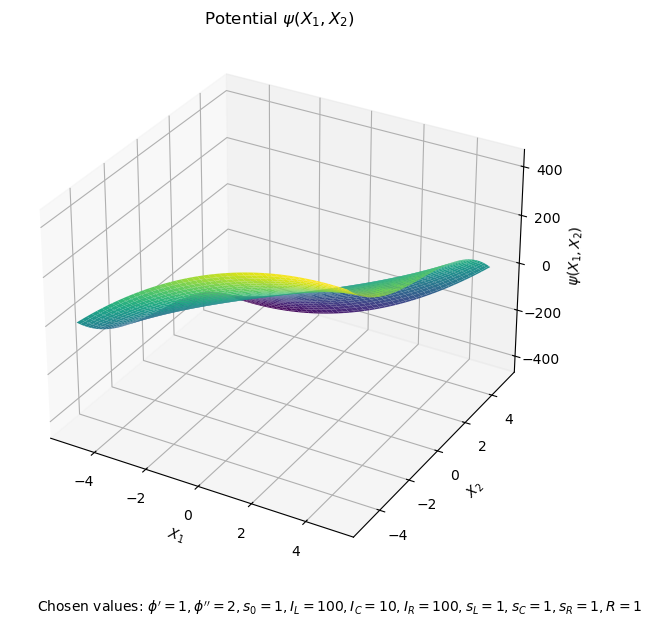

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir valores arbitrarios para los parámetros
phi_p_val = 1
phi_pp_val = 2
s0_val = 1
IL_val, IC_val, IR_val = 100, 10, 100
sL_val, sC_val, sR_val = 1, 1, 1
R_val = 1

# Convertir el potencial simbólico a función numérica
potencial_num = sp.lambdify((X1, X2), potencial_simplificado.subs({
    phi_p: phi_p_val,
    phi_pp: phi_pp_val,
    s0: s0_val,
    IL: IL_val,
    IC: IC_val,
    IR: IR_val,
    sL: sL_val,
    sC: sC_val,
    sR: sR_val,
    R: R_val
}))
# Add caption with the chosen values

# Crear malla de valores
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = potencial_num(X, Y)

# Gráfica 3D del potencial
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
caption = f"Chosen values: $\phi'={phi_p_val}, \phi''={phi_pp_val}, s_0={s0_val}, I_L={IL_val}, I_C={IC_val}, I_R={IR_val}, s_L={sL_val}, s_C={sC_val}, s_R={sR_val}, R = {R_val}$"
ax.text2D(0.05, -0.05, caption, transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$\psi(X_1,X_2)$')
ax.set_title('Potential $\psi(X_1,X_2)$')
plt.savefig('potencial.png', dpi = 600)
plt.show()



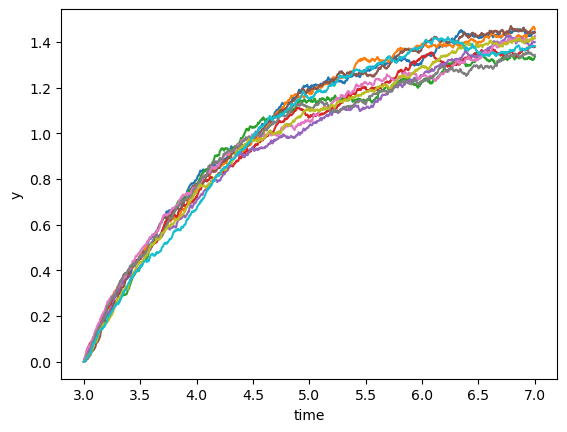

In [6]:
plot_simulations(10)